In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from scipy.stats import zscore, norm, randint

# supress warnings
import warnings
warnings.filterwarnings('ignore')

## Import data and Overview

In [43]:
df = pd.read_excel('Data_IPL.xlsx')
df.index = ([','.join('') for i in range(len(df))])
df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR -B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.000000,0,307,15,20.466667,8.898551,13.933333,2009,50000,50000
,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.000000,0,29,0,0.000000,14.500000,0.000000,2008,50000,50000
,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.014493,5,1059,29,36.517241,8.810316,24.896552,2008,200000,350000
,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.315789,0,1125,49,22.959184,6.232687,22.142857,2011,100000,850000
,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.714940,28,0,0,0.000000,0.000000,0.000000,2011,100000,800000


In [44]:
df.shape

# This dataframe has 130 rows and 25 columns

(130, 26)

In [45]:
df.columns

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS ', 'AVE', 'SR -B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries,  to 
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR -B          130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C         130 

In [47]:
# Some categorical variables are not in string data type. So, we need to typecast all the categorical
# variables into string

df[['AUCTION YEAR','TEAM','COUNTRY','PLAYING ROLE','AGE','CAPTAINCY EXP']] = df[['AUCTION YEAR','TEAM','COUNTRY','PLAYING ROLE','AGE','CAPTAINCY EXP']].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries,  to 
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    object 
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    object 
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR -B          130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C         130 

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl.NO.,130.0,65.500000,37.671829,1.0,33.250000,65.500000,97.750000,1.300000e+02
T-RUNS,130.0,2166.715385,3305.646757,0.0,25.500000,542.500000,3002.250000,1.547000e+04
T-WKTS,130.0,66.530769,142.676855,0.0,0.000000,7.000000,47.500000,8.000000e+02
ODI-RUNS-S,130.0,2508.738462,3582.205625,0.0,73.250000,835.000000,3523.500000,1.842600e+04
ODI-SR-B,130.0,71.164385,25.898440,0.0,65.650000,78.225000,86.790000,1.166600e+02
ODI-WKTS,130.0,76.076923,111.205070,0.0,0.000000,18.500000,106.000000,5.340000e+02
ODI-SR-BL,130.0,34.033846,26.751749,0.0,0.000000,36.600000,45.325000,1.500000e+02
RUNS-S,130.0,514.246154,615.226335,0.0,39.000000,172.000000,925.250000,2.254000e+03
HS,130.0,47.430769,36.403624,0.0,16.000000,35.500000,73.750000,1.580000e+02
AVE,130.0,18.719244,11.094102,0.0,9.825000,18.634921,27.872118,5.011111e+01


In [49]:
df.isna().sum()
# There is no null values in the dataframe

Sl.NO.           0
PLAYER NAME      0
AGE              0
COUNTRY          0
TEAM             0
PLAYING ROLE     0
T-RUNS           0
T-WKTS           0
ODI-RUNS-S       0
ODI-SR-B         0
ODI-WKTS         0
ODI-SR-BL        0
CAPTAINCY EXP    0
RUNS-S           0
HS               0
AVE              0
SR -B            0
SIXERS           0
RUNS-C           0
WKTS             0
AVE-BL           0
ECON             0
SR-BL            0
AUCTION YEAR     0
BASE PRICE       0
SOLD PRICE       0
dtype: int64

- From these informations we can already see that there are neither missing nor null values.

## Univariate Analysis


In [50]:
# Copy the code from https://github.com/code4kunal/eda-python-examples/blob/master/EDA-%20Malnutrion/Malnutrition_%20The%20disease%20that%20no%20one%20cares%20about.ipynb
def odp_plots(df, col):
    f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 7.2))
    
    # Boxplot to check outliers
    sns.boxplot(x = col, data = df, ax = ax1, orient = 'v', color = 'darkslategrey')
    
    # Distribution plot with outliers
    sns.distplot(df[col], ax = ax2, color = 'teal', fit = norm).set_title(f'{col} with outliers')
    
    # Removing outliers, but in a new dataframe
    upperbound, lowerbound = np.percentile(df[col], [1, 99])
    y = pd.DataFrame(np.clip(df[col], upperbound, lowerbound))
    
    # Distribution plot without outliers
    sns.distplot(y[col], ax = ax3, color = 'tab:orange', fit = norm).set_title(f'{col} without outliers')
    
    kwargs = {'fontsize':14, 'color':'black'}
    ax1.set_title(col + ' Boxplot Analysis', **kwargs)
    ax1.set_xlabel('Box', **kwargs)
    ax1.set_ylabel(col + ' Values', **kwargs)

    return plt.show()

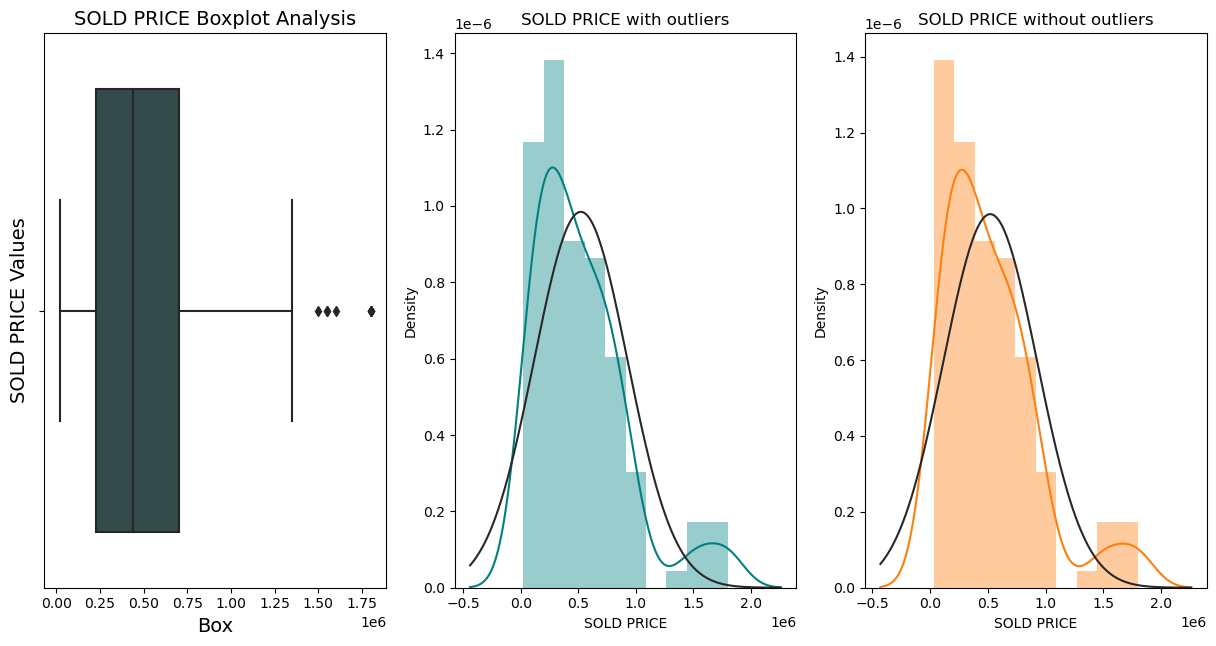

In [51]:
odp_plots(df,'SOLD PRICE')

- With this information, it can be seen that 'SOLD PRICE' are right-skewed and some outliers lie above ~1,400,000


## Multivariate Analysis

<AxesSubplot:>

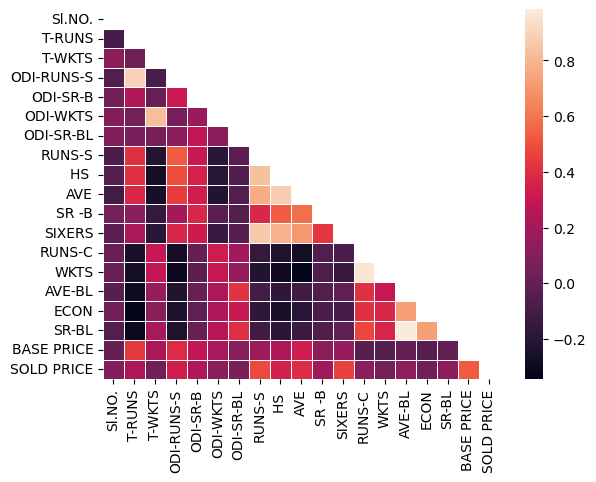

In [52]:
corr = df.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask,  linewidths = .5)

In [53]:
# Filter for correlation value greater than threshold
sort = corr.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
display(sort[(sort > 0.8) & (sort < 1)])

SR-BL       AVE-BL        0.983415
AVE-BL      SR-BL         0.983415
RUNS-C      WKTS          0.959210
WKTS        RUNS-C        0.959210
ODI-RUNS-S  T-RUNS        0.892823
T-RUNS      ODI-RUNS-S    0.892823
AVE         HS            0.876252
HS          AVE           0.876252
SIXERS      RUNS-S        0.866213
RUNS-S      SIXERS        0.866213
HS          RUNS-S        0.834631
RUNS-S      HS            0.834631
ODI-WKTS    T-WKTS        0.822940
T-WKTS      ODI-WKTS      0.822940
dtype: float64

- Correlation between Bowling average and Bowling strike rate are the highest (0.98).

## Sold price Insights
- Sold price trend by Country, Playing Role, Team, Age, and Aution Year
- How captaincy experience and experience to play for more than one team affect the sold price

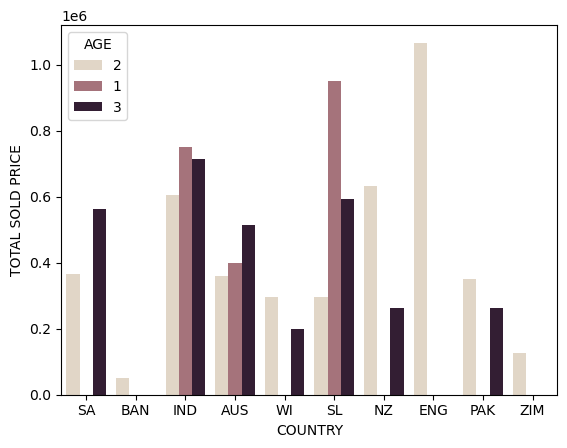

In [54]:
ax = sns.barplot(x = "COUNTRY", y = "SOLD PRICE", hue = 'AGE',
                 data = df, ci = None, palette = "ch:.25")
plt.xlabel('COUNTRY')
plt.ylabel('TOTAL SOLD PRICE')
plt.show()

- During auction, every country has players with age group between 25 and 35 years old. However, only India, Australia, and Sri lanka have players with age group below 25.

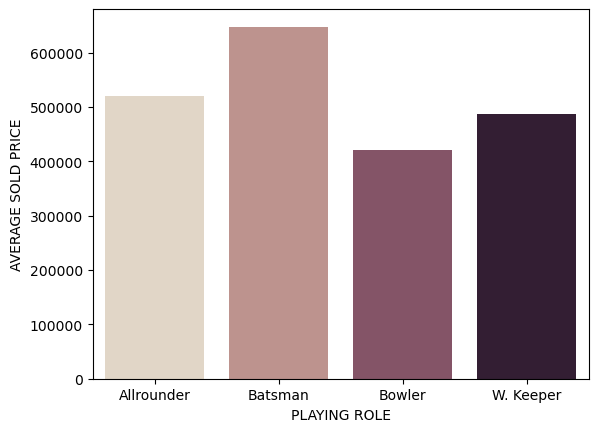

In [55]:
df_wage = df.groupby('PLAYING ROLE', as_index=False)['SOLD PRICE'].mean()
ax = sns.barplot(x = "PLAYING ROLE", y = "SOLD PRICE",
                 data = df_wage, palette = "ch:.25")
plt.xlabel('PLAYING ROLE')
plt.ylabel('AVERAGE SOLD PRICE')
plt.show()

- By average, the most expensive players bought at an IPL are Batsman, followed by Allrounder, W. Keeper, and Bowler

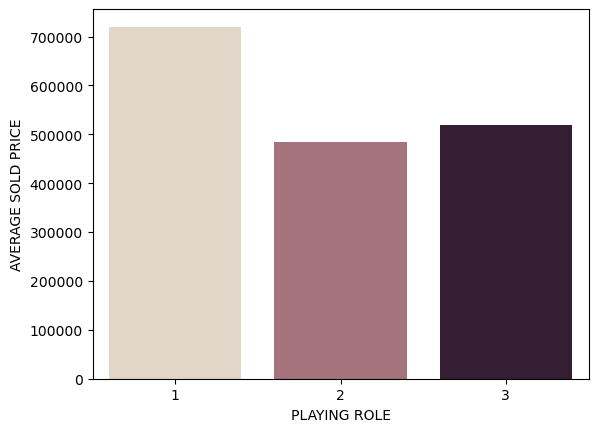

In [56]:
df_age = df.groupby('AGE', as_index=False)['SOLD PRICE'].mean()
ax = sns.barplot(x = "AGE", y = "SOLD PRICE",
                 data = df_age, palette = "ch:.25")
plt.xlabel('PLAYING ROLE')
plt.ylabel('AVERAGE SOLD PRICE')
plt.show()

- By average, Players who are below 25 years old are sold the highest during aution.

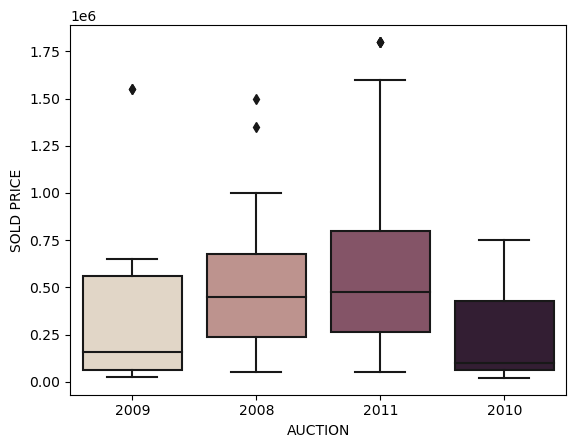

In [57]:
ax = sns.boxplot(x = "AUCTION YEAR", y = "SOLD PRICE", data = df, palette = "ch:.25")
plt.xlabel('AUCTION')
plt.ylabel('SOLD PRICE')
plt.show()

- Since 2008, the total sold price in auction kept depleted and reached the lowest point in 2010. Then, it was bounced back and increased significantly in 2011

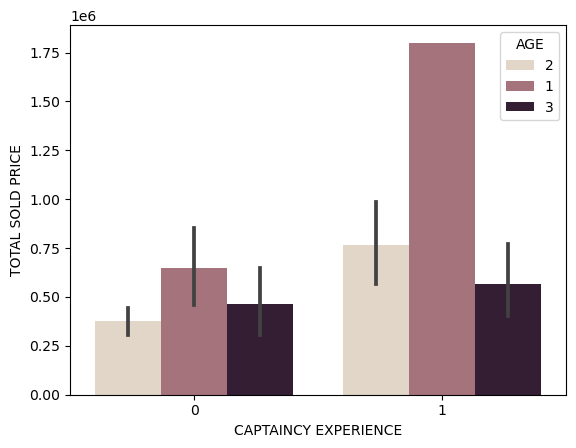

In [58]:
ax = sns.barplot(x = "CAPTAINCY EXP", y = "SOLD PRICE", hue = 'AGE',
                 data = df, palette = "ch:.25")
plt.xlabel('CAPTAINCY EXPERIENCE')
plt.ylabel('TOTAL SOLD PRICE')
plt.show()

- Captaincy Experience can be a plus point and increase players' sold price

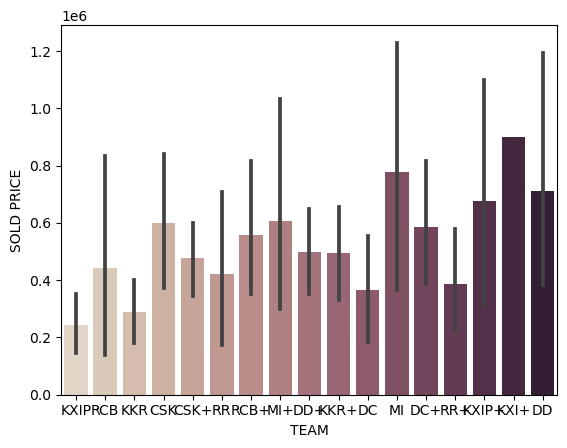

In [59]:
sns.barplot(x = "TEAM", y = "SOLD PRICE", data = df, palette = "ch:.25")
plt.show()

- KXI+, MI, and DD are top 3 teams who gained the most during the aution

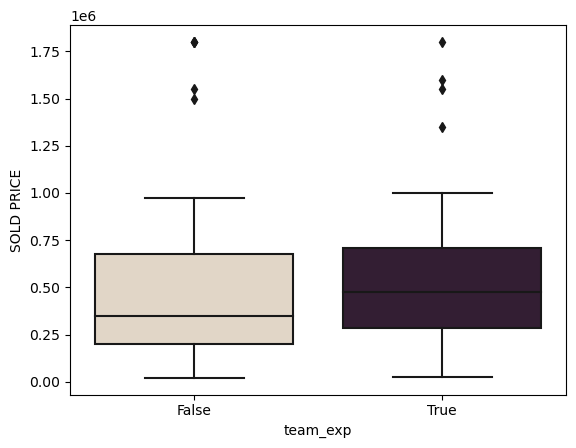

In [60]:
# Create new column for player who had played for more than one team called "team_exp"

df_team = df.copy(deep = True)
# df_team
df_team['team_exp'] = df_team['TEAM'].str.contains('\w[+]', case=False)
# df_team['team_exp'].value_counts()
sns.boxplot(x = "team_exp", y = "SOLD PRICE", data = df_team, palette = "ch:.25")
plt.show()

- Besides the captaincy experience, experience to play for more than one group is also an advantage which may increase the sold price

In [194]:
# Top 10 SOLD PRICE

df_sp = df.sort_values('SOLD PRICE', ascending= False)
df_sp = df_sp.head(10)
df_sp

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR -B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
,94,"Sehwag, V",2,IND,DD,Batsman,8178,40,8090,104.68,...,167.319679,79,226,6,37.666667,10.560748,21.666667,2011,400000,1800000
,128,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.58,...,131.876333,67,569,23,24.739130,7.024691,21.130435,2011,400000,1800000
,51,"Kohli, V",1,IND,RCB,Batsman,491,0,3590,86.31,...,119.286754,49,345,4,86.250000,8.840000,58.500000,2011,150000,1800000
,112,"Tendulkar, SR",3,IND,MI,Batsman,15470,45,18426,86.23,...,119.219569,24,58,0,0.000000,9.666667,0.000000,2011,400000,1800000
,114,"Tiwary, SS",1,IND,MI+,Batsman,0,0,49,87.50,...,119.599428,32,0,0,0.000000,0.000000,0.000000,2011,100000,1600000
,84,"Pietersen, KP",2,ENG,RCB+,Batsman,6654,5,4184,86.76,...,141.202673,30,215,7,30.714286,7.413793,24.857143,2009,1350000,1550000
,24,"Flintoff, A",2,ENG,CSK,Allrounder,3845,226,3394,88.82,...,116.980000,2,105,2,52.500000,9.545455,33.000000,2009,950000,1550000
,16,"Dhoni, MS",2,IND,CSK,W. Keeper,3509,0,6773,88.19,...,136.447167,64,0,0,0.000000,0.000000,0.000000,2008,400000,1500000
,109,"Symonds, A",3,AUS,DC+,Allrounder,1462,24,5088,92.44,...,129.866667,41,674,20,33.700000,7.702857,26.350000,2008,250000,1350000
,111,"Taylor, LRPL",2,NZ,RCB+,Batsman,2742,2,3185,81.77,...,130.276565,45,24,0,0.000000,12.000000,0.000000,2008,400000,1000000


<AxesSubplot:xlabel='COUNTRY', ylabel='count'>

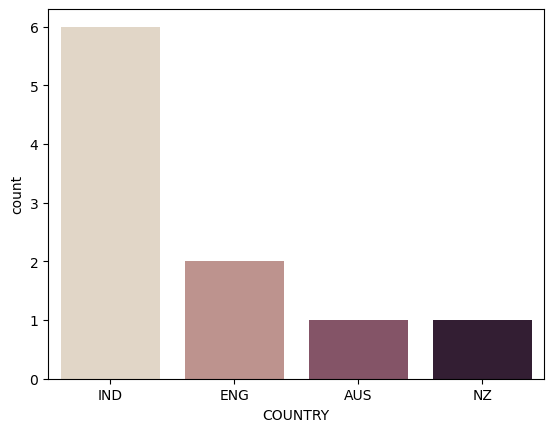

In [198]:
sns.countplot(x=df_sp['COUNTRY'], palette = "ch:.25")

<AxesSubplot:xlabel='AGE', ylabel='count'>

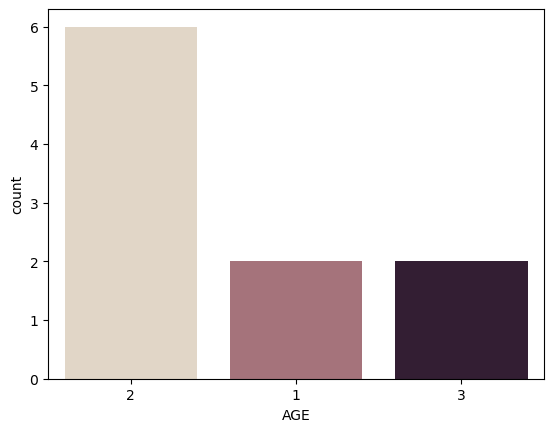

In [199]:
sns.countplot(x=df_sp['AGE'], palette = "ch:.25")

<AxesSubplot:xlabel='PLAYING ROLE', ylabel='count'>

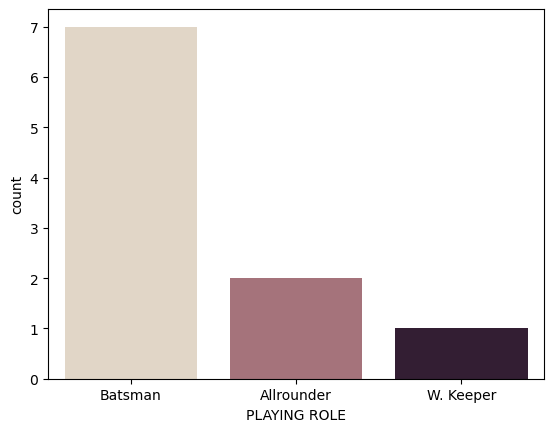

In [200]:
sns.countplot(x=df_sp['PLAYING ROLE'], palette = "ch:.25")

<AxesSubplot:ylabel='Frequency'>

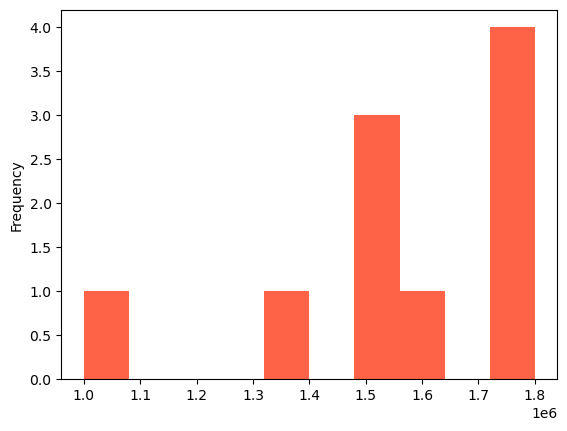

In [214]:
df_sp['SOLD PRICE'].plot(kind = 'hist', color = ['tomato'])

In [ ]:
In the top 10 highest sold price:
- more than half of the players are from India
- the majority of the players are between 25 and 35 years old age group (2).
- the biggest are from batsman
- Their sold price start from 1000000

## Players Performance Insight
- Numbers of player in the auction by age and country
- Number of runs score by playing role and age groups
- Number of wickets taken by playing role and age groups
- Highest score by Batsman


<AxesSubplot:xlabel='COUNTRY', ylabel='count'>

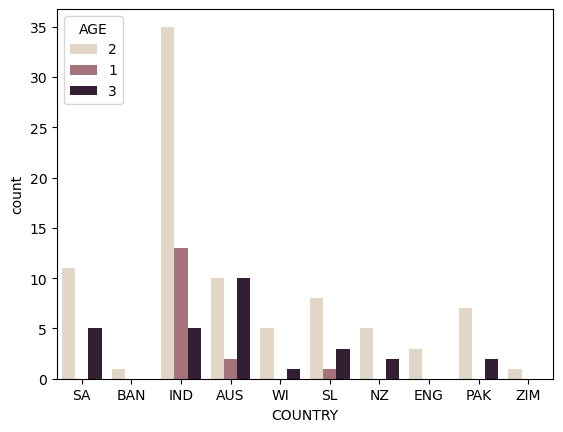

In [190]:
sns.countplot(data = df, x='COUNTRY', hue ='AGE', palette = "ch:.25")

- Beside the host country(INDIA), players in the auction are mostly came from South Africa (SA) and Australia 
- Players in the auction are mostly between 25 and 35 years old

In [81]:
df_run = df[["SR -B", "ODI-RUNS-S", "T-RUNS", 'PLAYING ROLE']]
df_run = df_run.groupby('PLAYING ROLE', as_index=False)[["SR -B", "ODI-RUNS-S", "T-RUNS"]].mean()
df_run

,PLAYING ROLE,SR -B,ODI-RUNS-S,T-RUNS
0,Allrounder,119.355429,2485.000000,1702.142857
1,Batsman,119.686470,4514.615385,4100.358974
2,Bowler,92.050223,317.409091,523.568182
3,W. Keeper,128.462790,4093.750000,3262.250000


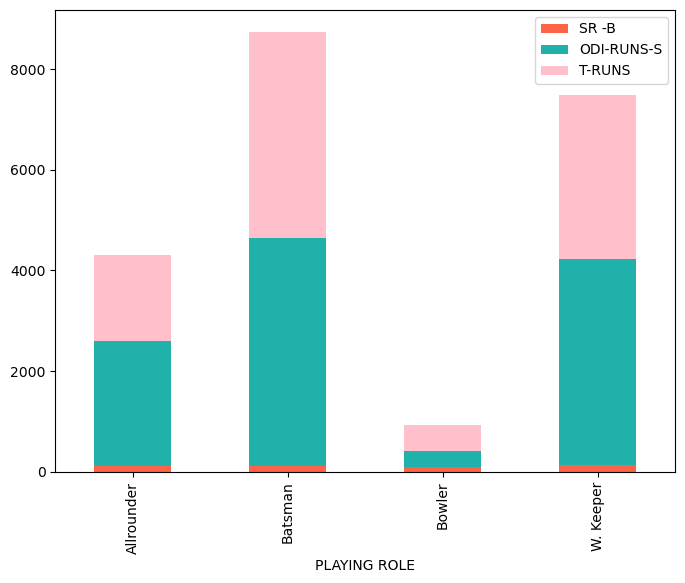

In [82]:
ax = df_run.plot.bar(x='PLAYING ROLE', stacked=True, color=['tomato','lightseagreen','pink'], figsize=(8,6))

- During One Day Internationals and Test Match, most runs by average are score by the batsman players.
- Although all playing roles have pretty similar chance to score the runs, the W. Keepers are most likely to score the runs during IPL (T-20 match)

In [85]:
df_age = df[["SR -B", "ODI-RUNS-S", "T-RUNS", 'AGE']]
df_age =df_age.groupby('AGE', as_index = False)[["SR -B", "ODI-RUNS-S", "T-RUNS"]].mean()
df_age

,AGE,SR -B,ODI-RUNS-S,T-RUNS
0,1,100.283937,814.812500,247.687500
1,2,115.692164,1889.976744,1538.662791
2,3,102.960949,5377.178571,5192.321429


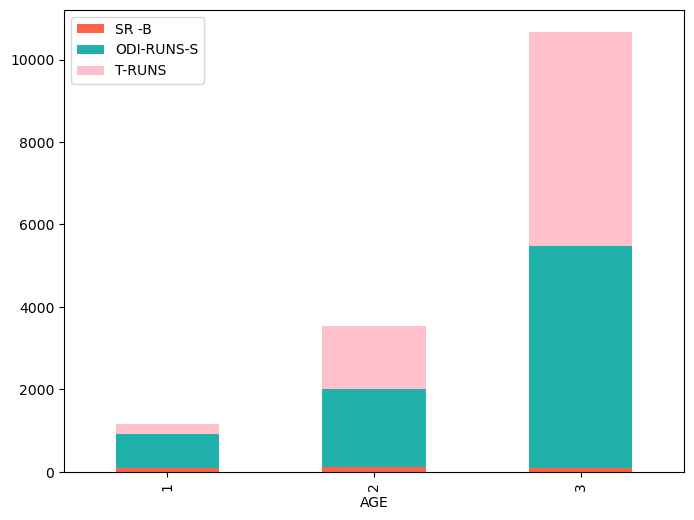

In [87]:
ax = df_age.plot.bar(x='AGE', stacked=True, color=['tomato','lightseagreen','pink'], figsize=(8,6))

- During One Day International and test match, players above 35 years old (3) are most likely scored the most runs.
- After a major change to format of T20, numbers of run score by all age group are pretty similar but the highest one are score by players between 25 and 35 years old (2).

In [90]:
df_wkts = df[["WKTS", "ODI-RUNS-S", "T-RUNS", 'PLAYING ROLE']]
df_wkts = df_wkts.groupby('PLAYING ROLE', as_index=False)[["WKTS", "ODI-RUNS-S", "T-RUNS"]].mean()
df_wkts

,PLAYING ROLE,WKTS,ODI-RUNS-S,T-RUNS
0,Allrounder,19.028571,2485.000000,1702.142857
1,Batsman,3.128205,4514.615385,4100.358974
2,Bowler,32.818182,317.409091,523.568182
3,W. Keeper,0.000000,4093.750000,3262.250000


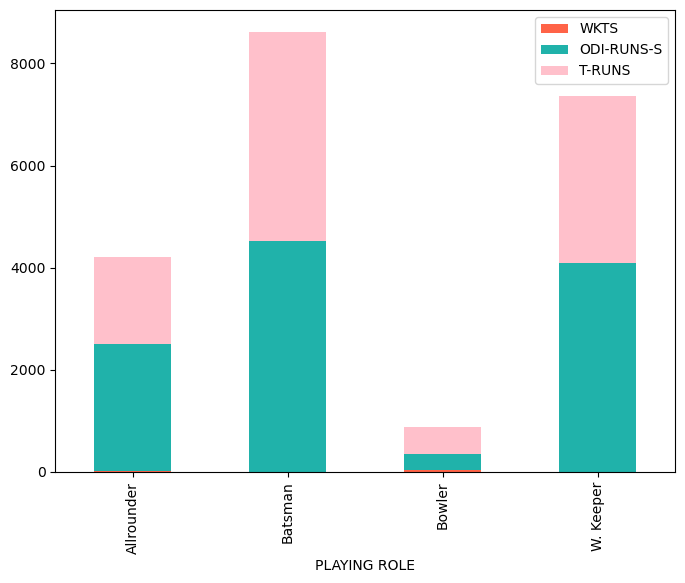

In [91]:
ax = df_wkts.plot.bar(x='PLAYING ROLE', stacked=True, color=['tomato','lightseagreen','pink'], figsize=(8,6))

- Players who took the wickets are mostly the (regular) Batsman during the ODI and test matches.
- However, after the format changing for the match, players who regularly a wicket keeper never took the wicket while most the wicket are taken by the Bowlers.

In [92]:
df_wktsa = df[["WKTS", "ODI-RUNS-S", "T-RUNS", 'AGE']]
df_wktsa = df_wktsa.groupby('AGE', as_index=False)[["WKTS", "ODI-RUNS-S", "T-RUNS"]].mean()
df_wktsa

,AGE,WKTS,ODI-RUNS-S,T-RUNS
0,1,23.937500,814.812500,247.687500
1,2,17.860465,1889.976744,1538.662791
2,3,11.178571,5377.178571,5192.321429


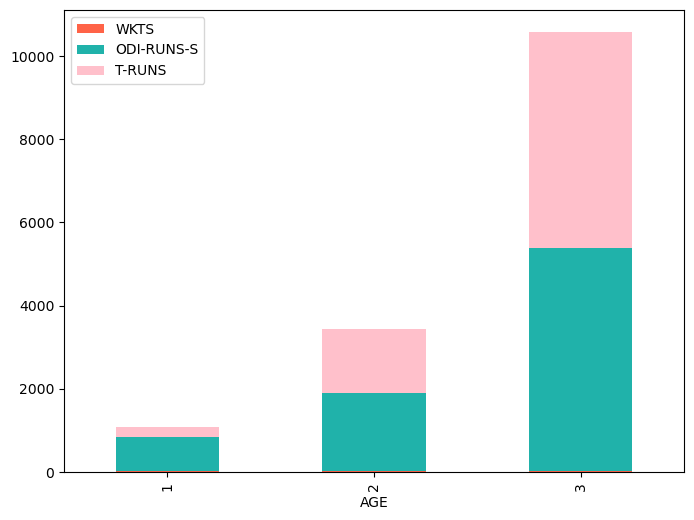

In [93]:
ax = df_wktsa.plot.bar(x='AGE', stacked=True, color=['tomato','lightseagreen','pink'], figsize=(8,6))

- During ODI and Test Match, there was a huge gap among the age groups showing that players above 35 years old (3) are most likely to take the wickets.
- Now, during IPL (T20 format), number of wickets taken among age groups are roughly equitable but players under 25 years old (1) are apt to take it.

In [137]:
# TOP 10 Highest score

df_hs = df[['PLAYER NAME','AGE','COUNTRY','TEAM','PLAYING ROLE','HS ','SOLD PRICE']]
df_hs = df_hs.sort_values('HS ', ascending = False)

df_hs = df_hs.head(10)
df_hs

,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,HS,SOLD PRICE
,"McCullum, BB",2,NZ,KKR+,W. Keeper,158,700000
,"Gayle, CH",2,WI,KKR+,Allrounder,128,800000
,"Sehwag, V",2,IND,DD,Batsman,119,1800000
,"Symonds, A",3,AUS,DC+,Allrounder,117,1350000
,"Hussey, MEK",3,AUS,CSK,Batsman,116,250000
,"Jayasuriya, ST",3,SL,MI,Allrounder,114,975000
,"Jayawardena, DPMD",2,SL,KXIP+,Batsman,110,475000
,"Gilchrist, AC",3,AUS,DC+,W. Keeper,109,700000
,"Sharma, RG",1,IND,DC+,Batsman,109,750000
,"Warner, DA",1,AUS,DD,Batsman,109,750000


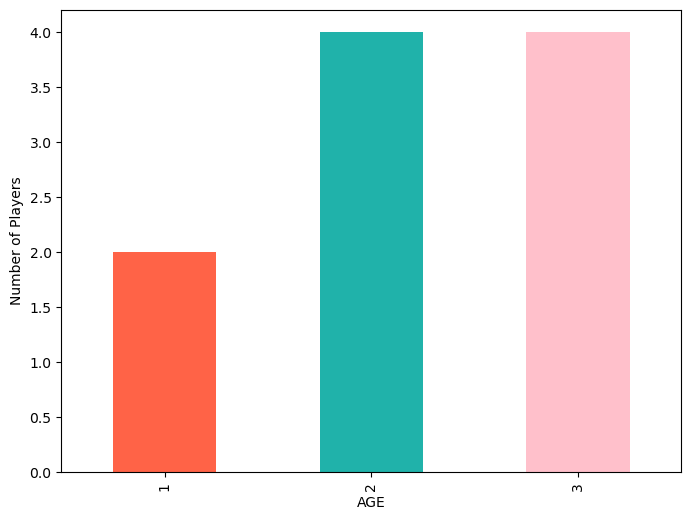

In [134]:
hs_age = df_hs.groupby(['AGE'])['HS '].count()
hs_age.plot.bar(color=['tomato','lightseagreen','pink'], figsize=(8,6))
plt.ylabel('Number of Players')
plt.show()
# hs_age

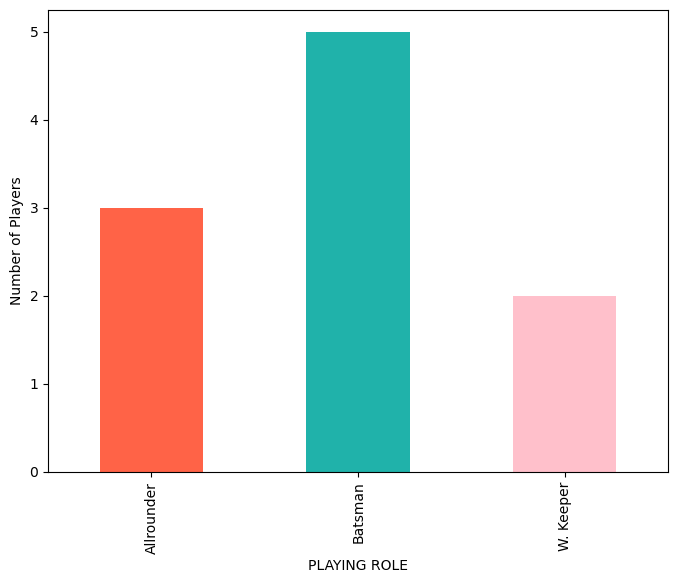

In [138]:
hs_role = df_hs.groupby(['PLAYING ROLE'])['HS '].count()
hs_role.plot.bar(color=['tomato','lightseagreen','pink'], figsize=(8,6))
plt.ylabel('Number of Players')
plt.show()
# hs_role

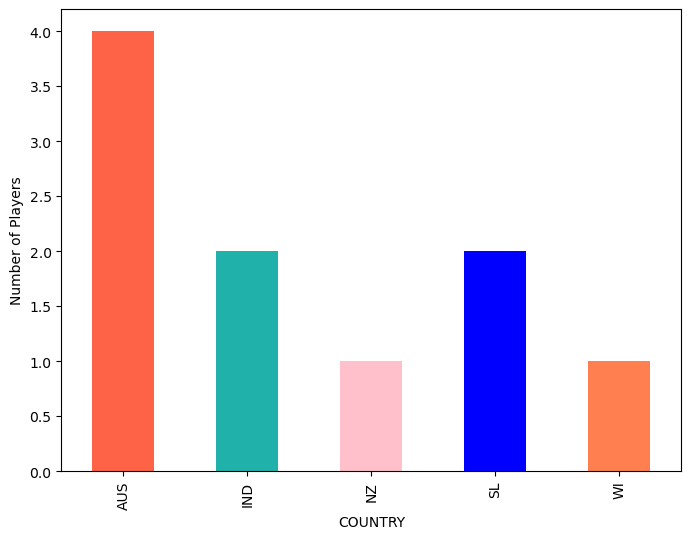

In [211]:
hs_ctr = df_hs.groupby(['COUNTRY'])['HS '].count()
hs_ctr.plot.bar(color=['tomato','lightseagreen','pink', 'blue', 'coral'], figsize=(8,6))
plt.ylabel('Number of Players')
plt.show()
# hs_ctr

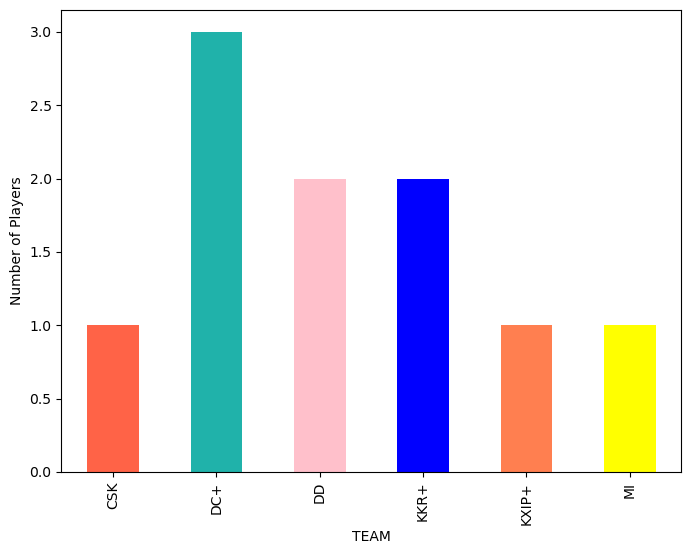

In [210]:
hs_team = df_hs.groupby(['TEAM'])['HS '].count()
hs_team.plot.bar(color=['tomato','lightseagreen','pink', 'blue', 'coral', 'yellow'], figsize=(8,6))
plt.ylabel('Number of Players')
plt.show()
# hs_team

In the top 10 highest score by batsman:
- B. McCallum scored the highest as the batsman
- 5 out of 10 highest scorer are the regular batsman
- Only one-fifth of the top 10 are under 25 years old (1)
- Nearly half of the top 10 highest scorer are from Australia
- players have played for more than 1 group

## Summary
- The highest sold price and the top scorers are batsman
- Captaincy experience and experience to play for more than one team can increase the sold price
- After a major match format change, the players performance are more evenly distributed. Ex: Despite their age and playing role, their performance are pretty much the same in the field